In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

In [6]:
url= "https://www.hubertiming.com/results/2018MLK"  #open link
html= urlopen(url)

In [7]:
soup= BeautifulSoup(html)

In [9]:
title= soup.title
print(title)
print(title.text)

<title>Race results for the 2018 MLK Dream Run!</title>
Race results for the 2018 MLK Dream Run!


In [12]:
links= soup.find_all('a')
print(links)

[<a href="https://www.mlkdreamrun.com/" target="_blank">MLK Dream Run</a>, <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>, <a href="https://www.hubertiming.com">Huber Timing Home</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 10K</a>, <a class="btn btn-primary btn-lg" href="/results/2018MLK15K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 15K</a>, <a class="btn btn-primary btn-lg" href="/results/summary/2018MLK" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>, <a id="individual" name="individual"></a>, <a data-url="/results/2018MLK" href="#tabs-1" id="rootTab" style="font-size: 18px">5K Results</a>, <a href="https://www.hubertiming.com/"><img height="65" src="https://www.hubertiming.com//sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber T

In [13]:
links= soup.find_all('a', href=True)
for link in links:
    print(link['href'])

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [17]:
allrows= soup.find_all("tr")
print(allrows[:10])

[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>191</td>
</tr>, <tr>
<td>Male:</td>
<td>78</td>
</tr>, <tr>
<td>Female:</td>
<td>113</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Pace</th>
<th>Chip Time</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="1191">
<td>1</td>
<td>1191</td>
<td>

                    MAX RANDOLPH

                </td>
<td>M</td>
<td>29</td>
<td>WASHINGTON</td>
<td>DC</td>
<td>5:25</td>
<td>16:48</td>
<td>

                    1 of 78

                </td>
<td>M 21-39</td>
<td>

                    1 of 33

                </td>
<td>0:08</td>
<td>16:56</td>
</tr>, <tr data-bib="1080">
<td>2</td>
<td>1080</td>
<td>

                    NEED NAME KAISER RUNNER

                </td>
<td>M</td>
<td>25</td>
<td>PORTLAND</td>
<td>OR</td>
<td>5:39</td>
<td>17:31</td>
<td>



In [19]:
allrows= soup.find_all("tr")
for row in allrows:
    row_list= row.find_all("td")
print(row_list)    

[<td>191</td>, <td>1216</td>, <td>

                    ZULMA OCHOA

                </td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>33:22</td>, <td>1:43:27</td>, <td>

                    113 of 113

                </td>, <td>F 40-54</td>, <td>

                    37 of 37

                </td>, <td>0:00</td>, <td>1:43:27</td>]


In [20]:
allrows= soup.find_all("tr")
for row in allrows:
    row_list= row.find_all("td")
print(row_list) 

for cell in row_list:
    print(cell.text)

[<td>191</td>, <td>1216</td>, <td>

                    ZULMA OCHOA

                </td>, <td>F</td>, <td>40</td>, <td>GRESHAM</td>, <td>OR</td>, <td>33:22</td>, <td>1:43:27</td>, <td>

                    113 of 113

                </td>, <td>F 40-54</td>, <td>

                    37 of 37

                </td>, <td>0:00</td>, <td>1:43:27</td>]
191
1216


                    ZULMA OCHOA

                
F
40
GRESHAM
OR
33:22
1:43:27


                    113 of 113

                
F 40-54


                    37 of 37

                
0:00
1:43:27


In [21]:
data=[]
allrows= soup.find_all("tr")
for row in allrows:
    row_list= row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
print(data)    

[[], ['Finishers:', '191'], ['Male:', '78'], ['Female:', '113'], [], ['1', '1191', '\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', 'M', '29', 'WASHINGTON', 'DC', '5:25', '16:48', '\r\n\r\n                    1 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 33\r\n\r\n                ', '0:08', '16:56'], ['2', '1080', '\r\n\r\n                    NEED NAME KAISER RUNNER\r\n\r\n                ', 'M', '25', 'PORTLAND', 'OR', '5:39', '17:31', '\r\n\r\n                    2 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    2 of 33\r\n\r\n                ', '0:09', '17:40'], ['3', '1275', '\r\n\r\n                    DAN FRANEK\r\n\r\n                ', 'M', '52', 'PORTLAND', 'OR', '5:53', '18:15', '\r\n\r\n                    3 of 78\r\n\r\n                ', 'M 40-54', '\r\n\r\n                    1 of 27\r\n\r\n                ', '0:07', '18:22'], ['4', '1223', '\r\n\r\n                    PAUL TAYLOR\r\n\r\n         

In [23]:
data=[]
allrows= soup.find_all("tr")
for row in allrows:
    row_list= row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
titles= data[0]    
data= data[1:]   
print(titles)
print(data[-2:]) 

[]
[['190', '2087', '\r\n\r\n                    LEESHA POSEY\r\n\r\n                ', 'F', '43', 'PORTLAND', 'OR', '30:17', '1:33:53', '\r\n\r\n                    112 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    36 of 37\r\n\r\n                ', '0:00', '1:33:53'], ['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [27]:
data=[]
allrows= soup.find_all("tr")
for row in allrows:
    row_list= row.find_all("td")
    dataRow = []
    for cell in row_list:
        dataRow.append(cell.text)
    data.append(dataRow)
data= data[4:]   
print(data[-2:]) 

[['190', '2087', '\r\n\r\n                    LEESHA POSEY\r\n\r\n                ', 'F', '43', 'PORTLAND', 'OR', '30:17', '1:33:53', '\r\n\r\n                    112 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    36 of 37\r\n\r\n                ', '0:00', '1:33:53'], ['191', '1216', '\r\n\r\n                    ZULMA OCHOA\r\n\r\n                ', 'F', '40', 'GRESHAM', 'OR', '33:22', '1:43:27', '\r\n\r\n                    113 of 113\r\n\r\n                ', 'F 40-54', '\r\n\r\n                    37 of 37\r\n\r\n                ', '0:00', '1:43:27']]


In [28]:
df= pd.DataFrame(data)
print(df)

       0     1                                                  2     3   \
0    None  None                                               None  None   
1       1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...     M   
2       2  1080  \r\n\r\n                    NEED NAME KAISER R...     M   
3       3  1275  \r\n\r\n                    DAN FRANEK\r\n\r\n...     M   
4       4  1223  \r\n\r\n                    PAUL TAYLOR\r\n\r\...     M   
..    ...   ...                                                ...   ...   
187   187  1254  \r\n\r\n                    CYNTHIA HARRIS\r\n...     F   
188   188  1085  \r\n\r\n                    EBONY LAWRENCE\r\n...     F   
189   189  1170  \r\n\r\n                    ANTHONY WILLIAMS\r...     M   
190   190  2087  \r\n\r\n                    LEESHA POSEY\r\n\r...     F   
191   191  1216  \r\n\r\n                    ZULMA OCHOA\r\n\r\...     F   

       4           5     6      7        8   \
0    None        None  None   None     N

In [29]:
print(df.head())

     0     1                                                  2     3     4   \
0  None  None                                               None  None  None   
1     1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...     M    29   
2     2  1080  \r\n\r\n                    NEED NAME KAISER R...     M    25   
3     3  1275  \r\n\r\n                    DAN FRANEK\r\n\r\n...     M    52   
4     4  1223  \r\n\r\n                    PAUL TAYLOR\r\n\r\...     M    54   

           5     6     7      8   \
0        None  None  None   None   
1  WASHINGTON    DC  5:25  16:48   
2    PORTLAND    OR  5:39  17:31   
3    PORTLAND    OR  5:53  18:15   
4    PORTLAND    OR  5:58  18:31   

                                                  9        10  \
0                                               None     None   
1  \r\n\r\n                    1 of 78\r\n\r\n   ...  M 21-39   
2  \r\n\r\n                    2 of 78\r\n\r\n   ...  M 21-39   
3  \r\n\r\n                    3 of 78\r\n

In [30]:
print(df.tail())

      0     1                                                  2  3   4   \
187  187  1254  \r\n\r\n                    CYNTHIA HARRIS\r\n...  F  64   
188  188  1085  \r\n\r\n                    EBONY LAWRENCE\r\n...  F  30   
189  189  1170  \r\n\r\n                    ANTHONY WILLIAMS\r...  M  39   
190  190  2087  \r\n\r\n                    LEESHA POSEY\r\n\r...  F  43   
191  191  1216  \r\n\r\n                    ZULMA OCHOA\r\n\r\...  F  40   

           5   6      7        8   \
187  PORTLAND  OR  21:53  1:07:51   
188  PORTLAND  OR  22:00  1:08:12   
189  PORTLAND  OR  22:19  1:09:11   
190  PORTLAND  OR  30:17  1:33:53   
191   GRESHAM  OR  33:22  1:43:27   

                                                    9        10  \
187  \r\n\r\n                    110 of 113\r\n\r\n...    F 55+   
188  \r\n\r\n                    111 of 113\r\n\r\n...  F 21-39   
189  \r\n\r\n                    78 of 78\r\n\r\n  ...  M 21-39   
190  \r\n\r\n                    112 of 113\r\n\r\n.

In [31]:
print(df.head(2))
print(df.tail(2))

     0     1                                                  2     3     4   \
0  None  None                                               None  None  None   
1     1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...     M    29   

           5     6     7      8   \
0        None  None  None   None   
1  WASHINGTON    DC  5:25  16:48   

                                                  9        10  \
0                                               None     None   
1  \r\n\r\n                    1 of 78\r\n\r\n   ...  M 21-39   

                                                  11    12     13  
0                                               None  None   None  
1  \r\n\r\n                    1 of 33\r\n\r\n   ...  0:08  16:56  
      0     1                                                  2  3   4   \
190  190  2087  \r\n\r\n                    LEESHA POSEY\r\n\r...  F  43   
191  191  1216  \r\n\r\n                    ZULMA OCHOA\r\n\r\...  F  40   

           5   6     

In [32]:
col_headers= soup.find_all('th')
col_headers

[<th>Place</th>,
 <th>Bib</th>,
 <th>Name</th>,
 <th>Gender</th>,
 <th>Age</th>,
 <th>City</th>,
 <th>State</th>,
 <th>Chip Pace</th>,
 <th>Chip Time</th>,
 <th>Gender Place</th>,
 <th>Age Group</th>,
 <th>Age Group Place</th>,
 <th>Time to Start</th>,
 <th>Gun Time</th>]

In [33]:
header_list = []
col_headers= soup.find_all('th')
for col in col_headers:
    header_list.append(col.text)
print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Chip Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [34]:
df.columns= header_list
print(df.head())

  Place   Bib                                               Name Gender   Age  \
0  None  None                                               None   None  None   
1     1  1191  \r\n\r\n                    MAX RANDOLPH\r\n\r...      M    29   
2     2  1080  \r\n\r\n                    NEED NAME KAISER R...      M    25   
3     3  1275  \r\n\r\n                    DAN FRANEK\r\n\r\n...      M    52   
4     4  1223  \r\n\r\n                    PAUL TAYLOR\r\n\r\...      M    54   

         City State Chip Pace Chip Time  \
0        None  None      None      None   
1  WASHINGTON    DC      5:25     16:48   
2    PORTLAND    OR      5:39     17:31   
3    PORTLAND    OR      5:53     18:15   
4    PORTLAND    OR      5:58     18:31   

                                        Gender Place Age Group  \
0                                               None      None   
1  \r\n\r\n                    1 of 78\r\n\r\n   ...   M 21-39   
2  \r\n\r\n                    2 of 78\r\n\r\n   ...   M

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Place            191 non-null    object
 1   Bib              191 non-null    object
 2   Name             191 non-null    object
 3   Gender           191 non-null    object
 4   Age              191 non-null    object
 5   City             191 non-null    object
 6   State            191 non-null    object
 7   Chip Pace        191 non-null    object
 8   Chip Time        191 non-null    object
 9   Gender Place     191 non-null    object
 10  Age Group        191 non-null    object
 11  Age Group Place  191 non-null    object
 12  Time to Start    191 non-null    object
 13  Gun Time         191 non-null    object
dtypes: object(14)
memory usage: 21.1+ KB


In [36]:
df.shape

(192, 14)

In [37]:
df2= df.dropna(axis=0, how='any')
df.shape

(192, 14)

In [53]:
# df2['ChipTime_minutes'] = pd.to_timedelta(df2['Chip Time'].str.replace(':'))
df2[['Chip Time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 191
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chip Time  191 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [62]:
# df2['ChipTime_minutes'] = pd.to_timedelta(df2['Chip Time'])
# df2['ChipTime_minutes'] = df2['ChipTime_minutes'].astype('timedelta64[s]')/60
df2[['Chip Time']].info()
print(df2[['Gender','Chip Time']].head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 191
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chip Time  191 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB
  Gender Chip Time
1      M     16:48
2      M     17:31
3      M     18:15
4      M     18:31
5      M     19:31


In [80]:
df2['ChipTime_minutes'] = pd.to_timedelta(df2['Chip Time'], errors='coerce')
df2['ChipTime_minutes'] = df2['ChipTime_minutes'].astype('timedelta64[s]')/60
df2[['ChipTime_minutes']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 191
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ChipTime_minutes  39 non-null     float64
dtypes: float64(1)
memory usage: 3.0 KB


C:\Users\sgitu\AppData\Local\Temp\ipykernel_25380\1974668295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ChipTime_minutes'] = pd.to_timedelta(df2['Chip Time'], errors='coerce')
C:\Users\sgitu\AppData\Local\Temp\ipykernel_25380\1974668295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ChipTime_minutes'] = df2['ChipTime_minutes'].astype('timedelta64[s]')/60


Text(0.5, 1.0, 'Comparison of average minutes run by male and female')

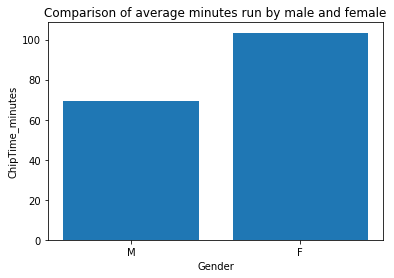

In [81]:
plt.bar(df2['Gender'], df2['ChipTime_minutes'])
plt.xlabel('Gender')
plt.ylabel('ChipTime_minutes')
plt.title("Comparison of average minutes run by male and female")

In [82]:
df2.describe(include=[np.number])

,ChipTime_minutes
count,39.000000
mean,64.243162
std,8.482094
min,60.016667
25%,60.800000
50%,62.016667
75%,63.016667
max,103.450000


Text(0, 0.5, 'Run Time')

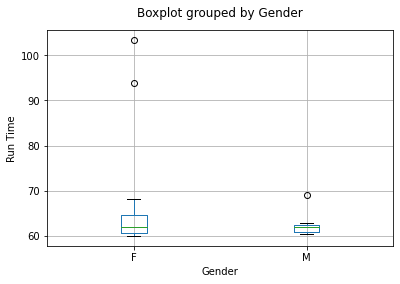

In [83]:
df2.boxplot(column='ChipTime_minutes', by= 'Gender')
plt.title('')
plt.ylabel('Run Time')

<function matplotlib.pyplot.show(close=None, block=None)>

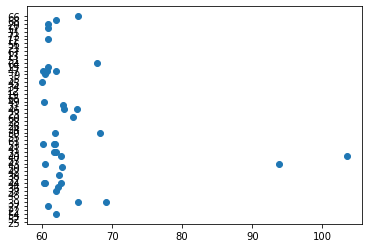

In [84]:
# age vs chip time in minutes
plt.scatter(df2['ChipTime_minutes'], df2['Age'])
plt.show

C:\Users\sgitu\AppData\Local\Temp\ipykernel_25380\80476703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age_i']= round(pd.to_numeric(df2['Age'], errors='coerce'))
C:\Users\sgitu\AppData\Local\Temp\ipykernel_25380\80476703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(how='any', inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

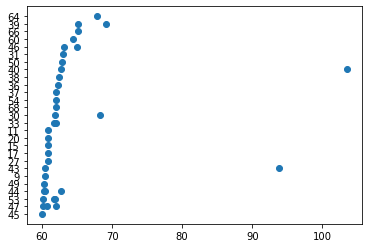

In [88]:
# age vs chip time in minutes
df2['Age_i']= round(pd.to_numeric(df2['Age'], errors='coerce'))
df2.dropna(how='any', inplace=True)


plt.scatter(df2['ChipTime_minutes'], df2['Age'])
plt.show